In [2]:
import pandas as pd # lib for dealing with data 
import numpy as np # lib for dealing with some math 
import matplotlib.pyplot as plt # lib for visualization data
import seaborn as sns 
plt.style.use('ggplot') # style for the plots 
import nltk  # for natural language token 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to C:\Users\DELL G3
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL G3 15\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\DELL G3
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\DELL G3
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\DELL G3
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
!pip3 install huggingface_hub

In [5]:
data = pd.read_csv("Reviews.csv")
data.head()
## NOTES 
# score → is the rate that the customer give for the service 
# text → is the comment that the customer leave 
# our work that creating machine can take the text column and analyse 
# to see if the rate is positive or negative or natural 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [29]:
data.shape # too many reviews (568454) 
data = data.head(1000)
data.shape # take 1000 reviews to deal with 

(1000, 10)

<function matplotlib.pyplot.show(close=None, block=None)>

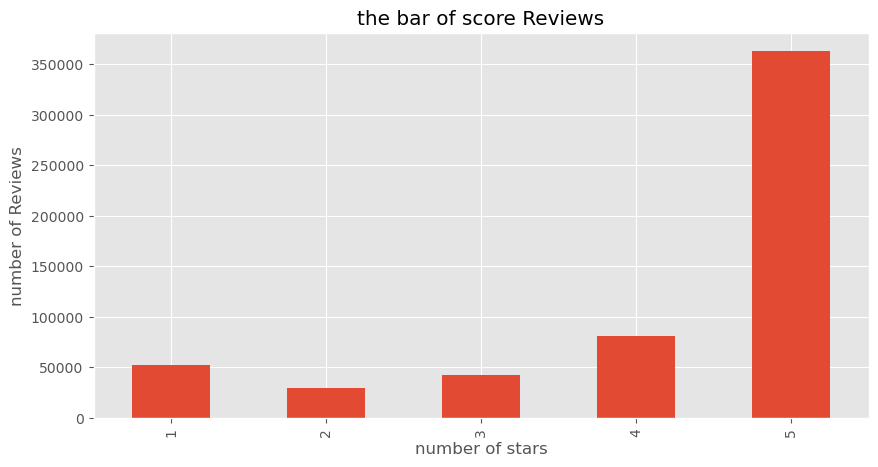

In [17]:
score_bar = data['Score'].value_counts().sort_index() 
score_bar = score_bar.plot(kind='bar',
                           title='the bar of score Reviews',
                           figsize=(10,5))
score_bar.set_xlabel('number of stars')
score_bar.set_ylabel('number of Reviews')
plt.show

In [19]:
ex = data['Text'][0]
ex

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [21]:
token = nltk.word_tokenize(ex)
token[:10] 

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food']

In [10]:
## open this link https://pythonexamples.org/nltk-pos-tagging/
taged = nltk.pos_tag(token)
taged[:10]

[('I', 'PRP'),
 ('have', 'VBP'),
 ('bought', 'VBN'),
 ('several', 'JJ'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Vitality', 'NNP'),
 ('canned', 'VBD'),
 ('dog', 'RP'),
 ('food', 'NN')]

In [11]:
entities = nltk.chunk.ne_chunk(taged)
entities.pprint()

(S
  I/PRP
  have/VBP
  bought/VBN
  several/JJ
  of/IN
  the/DT
  (ORGANIZATION Vitality/NNP)
  canned/VBD
  dog/RP
  food/NN
  products/NNS
  and/CC
  have/VBP
  found/VBN
  them/PRP
  all/DT
  to/TO
  be/VB
  of/IN
  good/JJ
  quality/NN
  ./.
  The/DT
  product/NN
  looks/VBZ
  more/RBR
  like/IN
  a/DT
  stew/NN
  than/IN
  a/DT
  processed/JJ
  meat/NN
  and/CC
  it/PRP
  smells/VBZ
  better/RBR
  ./.
  My/PRP$
  (ORGANIZATION Labrador/NNP)
  is/VBZ
  finicky/JJ
  and/CC
  she/PRP
  appreciates/VBZ
  this/DT
  product/NN
  better/JJR
  than/IN
  most/JJS
  ./.)


# 1- VADER Seniment Scoring: 
    using to get the positive, negative or natural scores of the text
    doing :: 
    1) remove stop words 
    2) each word is scored and compbined to a total score.

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 
sia =  SentimentIntensityAnalyzer()

In [23]:
# compound mean → that  from -1 to 1 what is the score ? 
# -1 mean negative 
# 0 natural 
# 1 happy 
# EX 1
sia.polarity_scores("i am so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [24]:
# EX2 
sia.polarity_scores("this is the worst day ever.")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [25]:
ex

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [26]:
sia.polarity_scores(ex)

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [27]:
## simple way to loop on data : 
for EX in data['Text'] : 
    value = sia.polarity_scores(EX)
    print(value)

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}
{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}
{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}
{'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}
{'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346}
{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487}
{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313}
{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}
{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579}
{'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296}
{'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466}
{'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486}
{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.5719}
{'neg': 0.097, 'neu':

{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'compound': 0.87}
{'neg': 0.072, 'neu': 0.781, 'pos': 0.147, 'compound': 0.9307}
{'neg': 0.078, 'neu': 0.793, 'pos': 0.129, 'compound': 0.5176}
{'neg': 0.054, 'neu': 0.69, 'pos': 0.257, 'compound': 0.9683}
{'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.9603}
{'neg': 0.044, 'neu': 0.898, 'pos': 0.058, 'compound': 0.1882}
{'neg': 0.055, 'neu': 0.873, 'pos': 0.072, 'compound': 0.0935}
{'neg': 0.077, 'neu': 0.78, 'pos': 0.143, 'compound': 0.3699}
{'neg': 0.042, 'neu': 0.763, 'pos': 0.195, 'compound': 0.9883}
{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'compound': 0.967}
{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.8531}
{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.6908}
{'neg': 0.034, 'neu': 0.743, 'pos': 0.223, 'compound': 0.9873}
{'neg': 0.054, 'neu': 0.782, 'pos': 0.164, 'compound': 0.9337}
{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.943}
{'neg': 0.0, 'ne

{'neg': 0.064, 'neu': 0.716, 'pos': 0.22, 'compound': 0.785}
{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.9577}
{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.899}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.143, 'neu': 0.717, 'pos': 0.14, 'compound': 0.2278}
{'neg': 0.034, 'neu': 0.833, 'pos': 0.134, 'compound': 0.8289}
{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.8422}
{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.9366}
{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'compound': 0.9298}
{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.6124}
{'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'compound': 0.7088}
{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.8271}
{'neg': 0.025, 'neu': 0.735, 'pos': 0.24, 'compound': 0.9505}
{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'compound': 0.7537}
{'neg': 0.043, 'neu': 0.925, 'pos': 0.033, 'compound': -0.1502}
{'neg': 0.018, 'neu': 0.917, 

{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.8957}
{'neg': 0.107, 'neu': 0.768, 'pos': 0.125, 'compound': 0.1154}
{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.8803}
{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.555}
{'neg': 0.089, 'neu': 0.489, 'pos': 0.421, 'compound': 0.916}
{'neg': 0.12, 'neu': 0.842, 'pos': 0.038, 'compound': -0.9493}
{'neg': 0.084, 'neu': 0.809, 'pos': 0.107, 'compound': 0.1697}
{'neg': 0.095, 'neu': 0.66, 'pos': 0.245, 'compound': 0.8673}
{'neg': 0.067, 'neu': 0.759, 'pos': 0.174, 'compound': 0.7337}
{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.9467}
{'neg': 0.033, 'neu': 0.934, 'pos': 0.033, 'compound': -0.0199}
{'neg': 0.056, 'neu': 0.819, 'pos': 0.125, 'compound': 0.8735}
{'neg': 0.0, 'neu': 0.557, 'pos': 0.443, 'compound': 0.926}
{'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.5719}
{'neg': 0.083, 'neu': 0.869, 'pos': 0.048, 'compound': -0.2474}
{'neg': 0.09, 'neu': 0.776, 'pos': 0.134, 'compound': 0.8263}
{'neg': 0

{'neg': 0.078, 'neu': 0.69, 'pos': 0.232, 'compound': 0.9808}
{'neg': 0.054, 'neu': 0.739, 'pos': 0.208, 'compound': 0.643}
{'neg': 0.024, 'neu': 0.9, 'pos': 0.076, 'compound': 0.7696}
{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.9001}
{'neg': 0.052, 'neu': 0.684, 'pos': 0.265, 'compound': 0.958}
{'neg': 0.077, 'neu': 0.629, 'pos': 0.294, 'compound': 0.802}
{'neg': 0.086, 'neu': 0.83, 'pos': 0.084, 'compound': 0.4249}
{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.8906}
{'neg': 0.017, 'neu': 0.907, 'pos': 0.076, 'compound': 0.8364}
{'neg': 0.082, 'neu': 0.687, 'pos': 0.231, 'compound': 0.9582}
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.9364}
{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.8555}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'compound': 0.2382}
{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.9436}
{'neg': 0.147, 'neu': 0.669, 'pos': 0.185, 'compound': 0.4988}
{'neg': 0.011, 'neu'

{'neg': 0.08, 'neu': 0.815, 'pos': 0.105, 'compound': 0.34}
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.6369}
{'neg': 0.087, 'neu': 0.778, 'pos': 0.136, 'compound': 0.4751}
{'neg': 0.031, 'neu': 0.942, 'pos': 0.027, 'compound': -0.1043}
{'neg': 0.055, 'neu': 0.81, 'pos': 0.135, 'compound': 0.4253}
{'neg': 0.245, 'neu': 0.636, 'pos': 0.118, 'compound': -0.918}
{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.5229}
{'neg': 0.124, 'neu': 0.641, 'pos': 0.235, 'compound': 0.887}
{'neg': 0.056, 'neu': 0.831, 'pos': 0.113, 'compound': 0.655}
{'neg': 0.051, 'neu': 0.652, 'pos': 0.297, 'compound': 0.8004}
{'neg': 0.144, 'neu': 0.809, 'pos': 0.047, 'compound': -0.6322}
{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.8462}
{'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'compound': 0.9098}
{'neg': 0.042, 'neu': 0.84, 'pos': 0.118, 'compound': 0.9686}
{'neg': 0.049, 'neu': 0.744, 'pos': 0.207, 'compound': 0.7777}
{'neg': 0.026, 'neu': 0.765, 'pos': 0.209, 'compound': 0.9052}
{'neg

{'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.9878}
{'neg': 0.047, 'neu': 0.66, 'pos': 0.293, 'compound': 0.979}
{'neg': 0.09, 'neu': 0.753, 'pos': 0.157, 'compound': 0.4641}
{'neg': 0.028, 'neu': 0.715, 'pos': 0.257, 'compound': 0.9211}
{'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.9335}
{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.8667}
{'neg': 0.043, 'neu': 0.859, 'pos': 0.098, 'compound': 0.6076}
{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.8562}
{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.9661}
{'neg': 0.009, 'neu': 0.788, 'pos': 0.204, 'compound': 0.9885}
{'neg': 0.091, 'neu': 0.777, 'pos': 0.132, 'compound': 0.6022}
{'neg': 0.0, 'neu': 0.869, 'pos': 0.131, 'compound': 0.9633}
{'neg': 0.028, 'neu': 0.804, 'pos': 0.169, 'compound': 0.9436}
{'neg': 0.019, 'neu': 0.807, 'pos': 0.175, 'compound': 0.9605}
{'neg': 0.0, 'neu': 0.716, 'pos': 0.284, 'compound': 0.8788}
{'neg': 0.049, 'neu': 0.745, 'pos': 0.206, 'compound': 0.9364}
{'neg': 0.0

{'neg': 0.038, 'neu': 0.751, 'pos': 0.211, 'compound': 0.9945}
{'neg': 0.0, 'neu': 0.596, 'pos': 0.404, 'compound': 0.8178}
{'neg': 0.094, 'neu': 0.666, 'pos': 0.24, 'compound': 0.9042}
{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'compound': 0.9324}
{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8979}
{'neg': 0.056, 'neu': 0.837, 'pos': 0.107, 'compound': 0.4019}
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.8807}
{'neg': 0.06, 'neu': 0.784, 'pos': 0.156, 'compound': 0.4753}
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.765}
{'neg': 0.079, 'neu': 0.635, 'pos': 0.286, 'compound': 0.7579}
{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'compound': 0.9008}
{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.9136}
{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.8854}
{'neg': 0.144, 'neu': 0.519, 'pos': 0.337, 'compound': 0.7469}
{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.8268}
{'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.8952}
{'neg': 0.106, 

{'neg': 0.041, 'neu': 0.883, 'pos': 0.076, 'compound': 0.7102}
{'neg': 0.35, 'neu': 0.544, 'pos': 0.106, 'compound': -0.6694}
{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.8405}
{'neg': 0.101, 'neu': 0.586, 'pos': 0.313, 'compound': 0.9693}
{'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'compound': 0.9678}
{'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.8481}
{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.9571}
{'neg': 0.029, 'neu': 0.741, 'pos': 0.23, 'compound': 0.932}
{'neg': 0.019, 'neu': 0.865, 'pos': 0.115, 'compound': 0.978}
{'neg': 0.167, 'neu': 0.803, 'pos': 0.03, 'compound': -0.9006}
{'neg': 0.04, 'neu': 0.867, 'pos': 0.093, 'compound': 0.818}
{'neg': 0.041, 'neu': 0.883, 'pos': 0.076, 'compound': 0.7102}
{'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'compound': -0.8008}
{'neg': 0.061, 'neu': 0.939, 'pos': 0.0, 'compound': -0.5667}
{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.9578}
{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.8885}
{'neg': 0.0, 'neu

{'neg': 0.086, 'neu': 0.823, 'pos': 0.092, 'compound': 0.8168}
{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5719}
{'neg': 0.069, 'neu': 0.795, 'pos': 0.135, 'compound': 0.9827}
{'neg': 0.092, 'neu': 0.692, 'pos': 0.217, 'compound': 0.9366}
{'neg': 0.13, 'neu': 0.847, 'pos': 0.023, 'compound': -0.8286}
{'neg': 0.069, 'neu': 0.795, 'pos': 0.135, 'compound': 0.9827}
{'neg': 0.086, 'neu': 0.823, 'pos': 0.092, 'compound': 0.8168}
{'neg': 0.079, 'neu': 0.845, 'pos': 0.076, 'compound': 0.2277}
{'neg': 0.039, 'neu': 0.873, 'pos': 0.088, 'compound': 0.3095}
{'neg': 0.019, 'neu': 0.682, 'pos': 0.299, 'compound': 0.9837}
{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.8934}
{'neg': 0.097, 'neu': 0.619, 'pos': 0.285, 'compound': 0.7946}
{'neg': 0.031, 'neu': 0.723, 'pos': 0.246, 'compound': 0.9733}
{'neg': 0.042, 'neu': 0.831, 'pos': 0.127, 'compound': 0.9489}
{'neg': 0.0, 'neu': 0.689, 'pos': 0.311, 'compound': 0.7774}
{'neg': 0.125, 'neu': 0.875, 'pos': 0.0, 'compound': -0.6941}

{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.8172}
{'neg': 0.046, 'neu': 0.793, 'pos': 0.161, 'compound': 0.5367}
{'neg': 0.068, 'neu': 0.658, 'pos': 0.274, 'compound': 0.9012}
{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.9348}
{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.9041}
{'neg': 0.0, 'neu': 0.646, 'pos': 0.354, 'compound': 0.8519}
{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.8748}
{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'compound': 0.4588}
{'neg': 0.025, 'neu': 0.775, 'pos': 0.2, 'compound': 0.9338}
{'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'compound': -0.7781}
{'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'compound': -0.4767}
{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.9371}
{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.9446}
{'neg': 0.07, 'neu': 0.754, 'pos': 0.175, 'compound': 0.7964}
{'neg': 0.042, 'neu': 0.828, 'pos': 0.131, 'compound': 0.9671}
{'neg': 0.013, 'neu': 0.788, 'pos': 0.2, 'compound': 0.966}
{'neg': 0.0, 'ne

{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.9184}
{'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'compound': 0.9612}
{'neg': 0.107, 'neu': 0.893, 'pos': 0.0, 'compound': -0.5927}
{'neg': 0.123, 'neu': 0.858, 'pos': 0.019, 'compound': -0.8479}
{'neg': 0.059, 'neu': 0.798, 'pos': 0.143, 'compound': 0.9816}
{'neg': 0.37, 'neu': 0.581, 'pos': 0.049, 'compound': -0.8327}
{'neg': 0.044, 'neu': 0.873, 'pos': 0.083, 'compound': 0.8325}
{'neg': 0.146, 'neu': 0.753, 'pos': 0.101, 'compound': -0.5222}
{'neg': 0.021, 'neu': 0.707, 'pos': 0.272, 'compound': 0.9628}
{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.7096}
{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.7506}
{'neg': 0.029, 'neu': 0.855, 'pos': 0.116, 'compound': 0.8845}
{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.904}
{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.9363}
{'neg': 0.06, 'neu': 0.64, 'pos': 0.3, 'compound': 0.9128}
{'neg': 0.041, 'neu': 0.7, 'pos': 0.258, 'compound': 0.9048}
{'neg': 0.

{'neg': 0.089, 'neu': 0.699, 'pos': 0.213, 'compound': 0.9804}
{'neg': 0.186, 'neu': 0.768, 'pos': 0.047, 'compound': -0.7517}
{'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'compound': 0.7879}
{'neg': 0.024, 'neu': 0.826, 'pos': 0.151, 'compound': 0.9583}
{'neg': 0.116, 'neu': 0.699, 'pos': 0.186, 'compound': 0.527}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.9508}
{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.9594}
{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.6474}
{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.9096}
{'neg': 0.074, 'neu': 0.479, 'pos': 0.447, 'compound': 0.9631}
{'neg': 0.03, 'neu': 0.832, 'pos': 0.138, 'compound': 0.7339}
{'neg': 0.066, 'neu': 0.846, 'pos': 0.088, 'compound': 0.1779}
{'neg': 0.138, 'neu': 0.729, 'pos': 0.133, 'compound': 0.1754}
{'neg': 0.043, 'neu': 0.787, 'pos': 0.169, 'compound': 0.9616}
{'neg': 0.038, 'neu': 0.696, 'pos': 0.266, 'compound': 0.9465}
{'neg': 0.068, 'neu': 0.629, 'pos': 0.303, 'compound': 0.9554}
{'n

{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.9889}
{'neg': 0.059, 'neu': 0.74, 'pos': 0.201, 'compound': 0.6167}
{'neg': 0.041, 'neu': 0.714, 'pos': 0.246, 'compound': 0.8157}
{'neg': 0.033, 'neu': 0.819, 'pos': 0.148, 'compound': 0.6988}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.9803}
{'neg': 0.041, 'neu': 0.813, 'pos': 0.147, 'compound': 0.994}
{'neg': 0.036, 'neu': 0.858, 'pos': 0.105, 'compound': 0.6478}
{'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'compound': 0.9081}
{'neg': 0.031, 'neu': 0.82, 'pos': 0.149, 'compound': 0.8605}
{'neg': 0.031, 'neu': 0.778, 'pos': 0.191, 'compound': 0.8513}
{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.8768}
{'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'compound': -0.7351}
{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.6124}
{'neg': 0.14, 'neu': 0.698, 'pos': 0.163, 'compound': 0.1904}
{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.8591}
{'neg': 0.0, 'neu'

{'neg': 0.077, 'neu': 0.776, 'pos': 0.147, 'compound': 0.6588}
{'neg': 0.031, 'neu': 0.706, 'pos': 0.263, 'compound': 0.9346}
{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'compound': 0.9577}
{'neg': 0.085, 'neu': 0.793, 'pos': 0.122, 'compound': 0.7508}
{'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.9949}
{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.9809}
{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.8658}
{'neg': 0.021, 'neu': 0.897, 'pos': 0.082, 'compound': 0.8058}
{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.8932}
{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.8932}
{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.6588}
{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.6597}
{'neg': 0.04, 'neu': 0.764, 'pos': 0.197, 'compound': 0.8933}
{'neg': 0.067, 'neu': 0.568, 'pos': 0.366, 'compound': 0.9458}
{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.9546}
{'neg': 0.068, 'neu': 0.89, 'pos': 0.042, 'compound': -0.1779}
{'neg': 0.0

{'neg': 0.04, 'neu': 0.876, 'pos': 0.084, 'compound': 0.7966}
{'neg': 0.018, 'neu': 0.758, 'pos': 0.224, 'compound': 0.9885}
{'neg': 0.092, 'neu': 0.772, 'pos': 0.136, 'compound': 0.8754}
{'neg': 0.012, 'neu': 0.724, 'pos': 0.264, 'compound': 0.9871}
{'neg': 0.0, 'neu': 0.665, 'pos': 0.335, 'compound': 0.902}
{'neg': 0.077, 'neu': 0.818, 'pos': 0.105, 'compound': 0.7889}
{'neg': 0.118, 'neu': 0.472, 'pos': 0.41, 'compound': 0.9244}
{'neg': 0.095, 'neu': 0.658, 'pos': 0.247, 'compound': 0.8562}
{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.9686}
{'neg': 0.018, 'neu': 0.849, 'pos': 0.133, 'compound': 0.975}
{'neg': 0.1, 'neu': 0.651, 'pos': 0.249, 'compound': 0.9636}
{'neg': 0.037, 'neu': 0.691, 'pos': 0.272, 'compound': 0.936}
{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'compound': 0.9547}
{'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'compound': 0.973}
{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.9207}
{'neg': 0.041, 'neu': 0.789, 'pos': 0.171, 'compound': 0.9471}
{'neg': 0.

{'neg': 0.099, 'neu': 0.798, 'pos': 0.103, 'compound': 0.0258}
{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.9125}
{'neg': 0.05, 'neu': 0.793, 'pos': 0.157, 'compound': 0.8863}
{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.9153}
{'neg': 0.053, 'neu': 0.772, 'pos': 0.174, 'compound': 0.9351}
{'neg': 0.0, 'neu': 0.544, 'pos': 0.456, 'compound': 0.9705}
{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.8807}
{'neg': 0.147, 'neu': 0.789, 'pos': 0.064, 'compound': -0.3672}
{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.6369}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.9707}
{'neg': 0.081, 'neu': 0.832, 'pos': 0.086, 'compound': 0.1611}
{'neg': 0.143, 'neu': 0.768, 'pos': 0.089, 'compound': -0.4574}
{'neg': 0.015, 'neu': 0.752, 'pos': 0.233, 'compound': 0.9604}
{'neg': 0.109, 'neu': 0.567, 'pos': 0.324, 'compound': 0.8625}
{'neg': 0.0, '

{'neg': 0.036, 'neu': 0.833, 'pos': 0.131, 'compound': 0.9087}
{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'compound': 0.7615}
{'neg': 0.101, 'neu': 0.749, 'pos': 0.15, 'compound': 0.1779}
{'neg': 0.064, 'neu': 0.761, 'pos': 0.175, 'compound': 0.8883}
{'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.9384}
{'neg': 0.044, 'neu': 0.742, 'pos': 0.214, 'compound': 0.9831}
{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.7184}
{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.8733}
{'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.8658}
{'neg': 0.043, 'neu': 0.845, 'pos': 0.111, 'compound': 0.5066}
{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.9531}
{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.7177}
{'neg': 0.115, 'neu': 0.848, 'pos': 0.037, 'compound': -0.8264}
{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'compound': 0.9693}
{'neg': 0.08, 'neu': 0.692, 'pos': 0.228, 'compound': 0.792}
{'neg': 0.025, '

{'neg': 0.009, 'neu': 0.768, 'pos': 0.222, 'compound': 0.9949}
{'neg': 0.095, 'neu': 0.762, 'pos': 0.143, 'compound': 0.3804}
{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'compound': 0.8016}
{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.5106}
{'neg': 0.064, 'neu': 0.828, 'pos': 0.108, 'compound': 0.8718}
{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.9115}
{'neg': 0.06, 'neu': 0.763, 'pos': 0.177, 'compound': 0.858}
{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.469, 'pos': 0.531, 'compound': 0.9274}
{'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'compound': 0.8479}
{'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'compound': 0.6931}
{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'compound': 0.8074}
{'neg': 0.215, 'neu': 0.623, 'pos': 0.162, 'compound': -0.4678}
{'neg': 0.127, 'neu': 0.776, 'pos': 0.097, 'compound': -0.8405}
{'neg': 0.0, 'neu': 0.948, 'pos': 0.052, 'compound': 0.5542}
{'neg': 0.129, 'neu': 0.702, 'pos': 0.17, 'compound': 0.1779}
{'neg': 0.0

{'neg': 0.073, 'neu': 0.886, 'pos': 0.041, 'compound': -0.3647}
{'neg': 0.048, 'neu': 0.736, 'pos': 0.216, 'compound': 0.9948}
{'neg': 0.0, 'neu': 0.626, 'pos': 0.374, 'compound': 0.959}
{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.9596}
{'neg': 0.069, 'neu': 0.764, 'pos': 0.167, 'compound': 0.8221}
{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.9282}
{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.8957}
{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.9324}
{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.9615}
{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.9042}
{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.5983}
{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'compound': 0.8713}
{'neg': 0.0, 'neu': 0.607, 'pos': 0.393, 'compound': 0.9184}
{'neg': 0.055, 'neu': 0.709, 'pos': 0.236, 'compound': 0.8249}
{'neg': 0.069, 'neu': 0.636, 'pos': 0.295, 'compound': 0.872}
{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.9565}
{'neg': 0.022, 'neu': 0

{'neg': 0.059, 'neu': 0.865, 'pos': 0.075, 'compound': 0.1016}
{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.9225}
{'neg': 0.137, 'neu': 0.803, 'pos': 0.061, 'compound': -0.9668}
{'neg': 0.0, 'neu': 0.499, 'pos': 0.501, 'compound': 0.9521}
{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.9336}
{'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.8968}
{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.8472}
{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'compound': 0.915}
{'neg': 0.027, 'neu': 0.88, 'pos': 0.093, 'compound': 0.7406}
{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.8761}
{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.8932}
{'neg': 0.063, 'neu': 0.863, 'pos': 0.074, 'compound': 0.1531}
{'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.9508}
{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'compound': 0.9341}
{'neg': 0.044, 'neu': 0.701, 'pos': 0.255, 'compound': 0.9508}
{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.7712}
{'neg': 0.0, 'neu

{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.9552}
{'neg': 0.024, 'neu': 0.882, 'pos': 0.093, 'compound': 0.5946}
{'neg': 0.056, 'neu': 0.764, 'pos': 0.18, 'compound': 0.8242}
{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.8834}
{'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.9816}
{'neg': 0.065, 'neu': 0.593, 'pos': 0.341, 'compound': 0.8834}
{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.9151}
{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.8793}
{'neg': 0.046, 'neu': 0.856, 'pos': 0.098, 'compound': 0.5478}
{'neg': 0.214, 'neu': 0.703, 'pos': 0.083, 'compound': -0.9779}
{'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.6167}
{'neg': 0.059, 'neu': 0.823, 'pos': 0.118, 'compound': 0.9009}
{'neg': 0.104, 'neu': 0.762, 'pos': 0.134, 'compound': 0.2708}
{'neg': 0.216, 'neu': 0.664, 'pos': 0.12, 'compound': -0.3182}
{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.9828}
{'neg':

{'neg': 0.1, 'neu': 0.855, 'pos': 0.045, 'compound': -0.9659}
{'neg': 0.121, 'neu': 0.751, 'pos': 0.128, 'compound': -0.4324}
{'neg': 0.119, 'neu': 0.624, 'pos': 0.257, 'compound': 0.9285}
{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.8856}
{'neg': 0.055, 'neu': 0.716, 'pos': 0.229, 'compound': 0.8067}
{'neg': 0.017, 'neu': 0.823, 'pos': 0.159, 'compound': 0.9512}
{'neg': 0.013, 'neu': 0.809, 'pos': 0.179, 'compound': 0.9711}
{'neg': 0.031, 'neu': 0.492, 'pos': 0.477, 'compound': 0.9977}
{'neg': 0.0, 'neu': 0.831, 'pos': 0.169, 'compound': 0.8858}
{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.7003}
{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.9253}
{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.9549}
{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.9293}
{'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'compound': -0.6848}
{'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.8122}
{'neg': 0.027, 'neu': 0.709, 'pos': 0.265, 'compound': 0.9143}
{'neg':

{'neg': 0.038, 'neu': 0.786, 'pos': 0.176, 'compound': 0.9882}
{'neg': 0.053, 'neu': 0.803, 'pos': 0.144, 'compound': 0.6136}
{'neg': 0.088, 'neu': 0.799, 'pos': 0.113, 'compound': 0.126}
{'neg': 0.092, 'neu': 0.846, 'pos': 0.063, 'compound': -0.1519}
{'neg': 0.013, 'neu': 0.782, 'pos': 0.205, 'compound': 0.9666}
{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.9558}
{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.9877}
{'neg': 0.051, 'neu': 0.799, 'pos': 0.15, 'compound': 0.906}
{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.69}
{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'compound': -0.5608}
{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.8885}
{'neg': 0.004, 'neu': 0.841, 'pos': 0.155, 'compound': 0.9941}
{'neg': 0.096, 'neu': 0.773, 'pos': 0.131, 'compound': 0.7935}
{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.9672}
{'neg': 0.032, 'neu': 0.813, 'pos': 0.155, 'compound': 0.9688}
{'neg': 0.063, 'neu': 0.79, 'pos': 0.146, 'compound': 0.9854}
{'neg': 0.05

{'neg': 0.096, 'neu': 0.837, 'pos': 0.067, 'compound': -0.8991}
{'neg': 0.038, 'neu': 0.795, 'pos': 0.167, 'compound': 0.8433}
{'neg': 0.04, 'neu': 0.809, 'pos': 0.151, 'compound': 0.8354}
{'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'compound': 0.9201}
{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.91}
{'neg': 0.039, 'neu': 0.804, 'pos': 0.157, 'compound': 0.9563}
{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.875}
{'neg': 0.053, 'neu': 0.801, 'pos': 0.146, 'compound': 0.7849}
{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.802}
{'neg': 0.0, 'neu': 0.907, 'pos': 0.093, 'compound': 0.7506}
{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.857}
{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'compound': 0.9638}
{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.9298}
{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.8885}
{'neg': 0.018, 'neu': 0.71, 'pos': 0.272, 'compound': 0.99}
{'neg': 0.112, 'neu'

{'neg': 0.024, 'neu': 0.87, 'pos': 0.106, 'compound': 0.9741}
{'neg': 0.054, 'neu': 0.767, 'pos': 0.179, 'compound': 0.8861}
{'neg': 0.14, 'neu': 0.74, 'pos': 0.12, 'compound': 0.3401}
{'neg': 0.065, 'neu': 0.797, 'pos': 0.138, 'compound': 0.8206}
{'neg': 0.192, 'neu': 0.676, 'pos': 0.132, 'compound': -0.4344}
{'neg': 0.075, 'neu': 0.872, 'pos': 0.053, 'compound': -0.0245}
{'neg': 0.07, 'neu': 0.93, 'pos': 0.0, 'compound': -0.2732}
{'neg': 0.029, 'neu': 0.71, 'pos': 0.261, 'compound': 0.9835}
{'neg': 0.031, 'neu': 0.753, 'pos': 0.216, 'compound': 0.8885}
{'neg': 0.029, 'neu': 0.853, 'pos': 0.119, 'compound': 0.6597}
{'neg': 0.07, 'neu': 0.799, 'pos': 0.131, 'compound': 0.6875}
{'neg': 0.009, 'neu': 0.845, 'pos': 0.146, 'compound': 0.9805}
{'neg': 0.041, 'neu': 0.756, 'pos': 0.203, 'compound': 0.8947}
{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.902}
{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.9849}
{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.9707}
{'neg': 

{'neg': 0.081, 'neu': 0.848, 'pos': 0.071, 'compound': 0.1759}
{'neg': 0.014, 'neu': 0.839, 'pos': 0.147, 'compound': 0.964}
{'neg': 0.045, 'neu': 0.809, 'pos': 0.147, 'compound': 0.9839}
{'neg': 0.026, 'neu': 0.85, 'pos': 0.124, 'compound': 0.8514}
{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.9608}
{'neg': 0.021, 'neu': 0.837, 'pos': 0.143, 'compound': 0.8883}
{'neg': 0.019, 'neu': 0.793, 'pos': 0.187, 'compound': 0.8993}
{'neg': 0.166, 'neu': 0.818, 'pos': 0.016, 'compound': -0.9765}
{'neg': 0.02, 'neu': 0.764, 'pos': 0.216, 'compound': 0.9844}
{'neg': 0.024, 'neu': 0.868, 'pos': 0.108, 'compound': 0.7991}
{'neg': 0.055, 'neu': 0.817, 'pos': 0.128, 'compound': 0.8491}
{'neg': 0.111, 'neu': 0.796, 'pos': 0.094, 'compound': -0.4417}
{'neg': 0.041, 'neu': 0.736, 'pos': 0.223, 'compound': 0.8777}
{'neg': 0.025, 'neu': 0.932, 'pos': 0.043, 'compound': 0.3798}
{'neg': 0.124, 'neu': 0.776, 'pos': 0.099, 'compound': -0.784}
{'neg': 0.062, 'neu': 0.837, 'pos': 0.101, 'compound': 0.7

{'neg': 0.055, 'neu': 0.752, 'pos': 0.192, 'compound': 0.9077}
{'neg': 0.053, 'neu': 0.856, 'pos': 0.091, 'compound': 0.5987}
{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.5095}
{'neg': 0.073, 'neu': 0.861, 'pos': 0.066, 'compound': 0.0772}
{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.8004}
{'neg': 0.053, 'neu': 0.713, 'pos': 0.235, 'compound': 0.7996}
{'neg': 0.142, 'neu': 0.642, 'pos': 0.216, 'compound': 0.7176}
{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.935}
{'neg': 0.069, 'neu': 0.795, 'pos': 0.136, 'compound': 0.935}
{'neg': 0.04, 'neu': 0.559, 'pos': 0.402, 'compound': 0.9643}
{'neg': 0.035, 'neu': 0.772, 'pos': 0.193, 'compound': 0.9736}
{'neg': 0.054, 'neu': 0.694, 'pos': 0.252, 'compound': 0.9642}
{'neg': 0.05, 'neu': 0.541, 'pos': 0.41, 'compound': 0.9324}
{'neg': 0.0, 'neu': 0.592, 'pos': 0.408, 'compound': 0.9201}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'ne

{'neg': 0.065, 'neu': 0.782, 'pos': 0.154, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.7494}
{'neg': 0.044, 'neu': 0.664, 'pos': 0.292, 'compound': 0.9184}
{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.895}
{'neg': 0.234, 'neu': 0.714, 'pos': 0.052, 'compound': -0.8634}
{'neg': 0.062, 'neu': 0.621, 'pos': 0.317, 'compound': 0.902}
{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'compound': 0.9317}
{'neg': 0.069, 'neu': 0.892, 'pos': 0.039, 'compound': -0.1356}
{'neg': 0.047, 'neu': 0.747, 'pos': 0.206, 'compound': 0.8342}
{'neg': 0.125, 'neu': 0.684, 'pos': 0.191, 'compound': 0.5184}
{'neg': 0.056, 'neu': 0.773, 'pos': 0.171, 'compound': 0.816}
{'neg': 0.04, 'neu': 0.723, 'pos': 0.237, 'compound': 0.884}
{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.6191}
{'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'compound': 0.7603}
{'neg': 0.03, 'neu': 0.894, 'pos': 0.075, 'compound': 0.6692}
{'neg': 0.043, 'neu': 0.844, 'pos': 0.113, 'compound': 0.8624}
{'neg'

{'neg': 0.262, 'neu': 0.66, 'pos': 0.078, 'compound': -0.9662}
{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'compound': 0.9747}
{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.3947}
{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.529}
{'neg': 0.018, 'neu': 0.736, 'pos': 0.246, 'compound': 0.9632}
{'neg': 0.033, 'neu': 0.697, 'pos': 0.27, 'compound': 0.9103}
{'neg': 0.091, 'neu': 0.739, 'pos': 0.171, 'compound': 0.823}
{'neg': 0.014, 'neu': 0.833, 'pos': 0.153, 'compound': 0.9231}
{'neg': 0.119, 'neu': 0.845, 'pos': 0.036, 'compound': -0.6094}
{'neg': 0.103, 'neu': 0.659, 'pos': 0.238, 'compound': 0.7639}
{'neg': 0.058, 'neu': 0.849, 'pos': 0.093, 'compound': 0.4003}
{'neg': 0.035, 'neu': 0.749, 'pos': 0.216, 'compound': 0.8573}
{'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compound': 0.9259}
{'neg': 0.059, 'neu': 0.721, 'pos': 0.221, 'compound': 0.8126}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.8975}
{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.6908}
{'neg': 

{'neg': 0.054, 'neu': 0.751, 'pos': 0.195, 'compound': 0.9757}
{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.8271}
{'neg': 0.126, 'neu': 0.786, 'pos': 0.088, 'compound': 0.2023}
{'neg': 0.104, 'neu': 0.642, 'pos': 0.254, 'compound': 0.8316}
{'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'compound': 0.9168}
{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'compound': 0.8622}
{'neg': 0.077, 'neu': 0.923, 'pos': 0.0, 'compound': -0.126}
{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.9618}
{'neg': 0.018, 'neu': 0.638, 'pos': 0.344, 'compound': 0.9749}
{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'compound': 0.4239}
{'neg': 0.055, 'neu': 0.679, 'pos': 0.266, 'compound': 0.8032}
{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.9038}
{'neg': 0.086, 'neu': 0.773, 'pos': 0.141, 'compound': 0.6243}
{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'compound': 0.4215}
{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.9665}
{'neg': 0.067, 'neu': 0.788, 'pos': 0.145, 'compound': 0.855}
{'neg': 0.0

{'neg': 0.085, 'neu': 0.65, 'pos': 0.265, 'compound': 0.9604}
{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.9337}
{'neg': 0.031, 'neu': 0.85, 'pos': 0.12, 'compound': 0.5541}
{'neg': 0.057, 'neu': 0.85, 'pos': 0.093, 'compound': 0.405}
{'neg': 0.09, 'neu': 0.802, 'pos': 0.108, 'compound': 0.2732}
{'neg': 0.134, 'neu': 0.847, 'pos': 0.019, 'compound': -0.9536}
{'neg': 0.148, 'neu': 0.722, 'pos': 0.13, 'compound': -0.3616}
{'neg': 0.075, 'neu': 0.859, 'pos': 0.066, 'compound': 0.1531}
{'neg': 0.084, 'neu': 0.681, 'pos': 0.235, 'compound': 0.93}
{'neg': 0.148, 'neu': 0.663, 'pos': 0.189, 'compound': 0.3218}
{'neg': 0.07, 'neu': 0.764, 'pos': 0.167, 'compound': 0.4516}
{'neg': 0.119, 'neu': 0.801, 'pos': 0.08, 'compound': -0.3071}
{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.8478}
{'neg': 0.038, 'neu': 0.558, 'pos': 0.403, 'compound': 0.9542}
{'neg': 0.05, 'neu': 0.76, 'pos': 0.189, 'compound': 0.8817}
{'neg': 0.192, 'neu': 0.728, 'pos': 0.08, 'compound': -0.8192}
{'neg'

{'neg': 0.01, 'neu': 0.78, 'pos': 0.21, 'compound': 0.9953}
{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.9761}
{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.9627}
{'neg': 0.068, 'neu': 0.9, 'pos': 0.033, 'compound': -0.34}
{'neg': 0.063, 'neu': 0.754, 'pos': 0.183, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.8591}
{'neg': 0.041, 'neu': 0.918, 'pos': 0.041, 'compound': 0.0026}
{'neg': 0.092, 'neu': 0.847, 'pos': 0.06, 'compound': -0.5267}
{'neg': 0.111, 'neu': 0.602, 'pos': 0.288, 'compound': 0.6908}
{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.9856}
{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'compound': 0.7968}
{'neg': 0.04, 'neu': 0.776, 'pos': 0.184, 'compound': 0.949}
{'neg': 0.061, 'neu': 0.713, 'pos': 0.226, 'compound': 0.7574}
{'neg': 0.027, 'neu': 0.678, 'pos': 0.295, 'compound': 0.975}
{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.6948}
{'neg': 0.05, 'neu': 0.771, 'pos': 0.179, 'compound': 0.8338}
{'neg': 0.062, '

{'neg': 0.026, 'neu': 0.811, 'pos': 0.164, 'compound': 0.985}
{'neg': 0.168, 'neu': 0.765, 'pos': 0.068, 'compound': -0.9119}
{'neg': 0.071, 'neu': 0.863, 'pos': 0.065, 'compound': 0.497}
{'neg': 0.029, 'neu': 0.916, 'pos': 0.055, 'compound': 0.3626}
{'neg': 0.113, 'neu': 0.818, 'pos': 0.07, 'compound': -0.5728}
{'neg': 0.099, 'neu': 0.815, 'pos': 0.086, 'compound': -0.951}
{'neg': 0.174, 'neu': 0.754, 'pos': 0.072, 'compound': -0.8916}
{'neg': 0.124, 'neu': 0.761, 'pos': 0.114, 'compound': -0.3575}
{'neg': 0.068, 'neu': 0.75, 'pos': 0.182, 'compound': 0.8014}
{'neg': 0.105, 'neu': 0.712, 'pos': 0.183, 'compound': 0.8867}
{'neg': 0.095, 'neu': 0.683, 'pos': 0.222, 'compound': 0.9369}
{'neg': 0.048, 'neu': 0.723, 'pos': 0.229, 'compound': 0.9496}
{'neg': 0.054, 'neu': 0.662, 'pos': 0.284, 'compound': 0.9212}
{'neg': 0.1, 'neu': 0.739, 'pos': 0.161, 'compound': 0.6218}
{'neg': 0.023, 'neu': 0.667, 'pos': 0.31, 'compound': 0.9299}
{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.929

{'neg': 0.096, 'neu': 0.816, 'pos': 0.087, 'compound': -0.5794}
{'neg': 0.031, 'neu': 0.829, 'pos': 0.14, 'compound': 0.8919}
{'neg': 0.13, 'neu': 0.807, 'pos': 0.062, 'compound': -0.5106}
{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.8537}
{'neg': 0.065, 'neu': 0.867, 'pos': 0.068, 'compound': 0.0243}
{'neg': 0.047, 'neu': 0.803, 'pos': 0.15, 'compound': 0.7952}
{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.8016}
{'neg': 0.21, 'neu': 0.7, 'pos': 0.091, 'compound': -0.4118}
{'neg': 0.054, 'neu': 0.867, 'pos': 0.079, 'compound': 0.4588}
{'neg': 0.051, 'neu': 0.782, 'pos': 0.167, 'compound': 0.8934}
{'neg': 0.128, 'neu': 0.833, 'pos': 0.039, 'compound': -0.7641}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.092, 'neu': 0.722, 'pos': 0.186, 'compound': 0.8807}
{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.899}
{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.9698}
{'neg': 0.049, 'neu': 0.858, 'pos': 0.093, 'compound': 0.5707}
{'neg': 0.11

{'neg': 0.038, 'neu': 0.804, 'pos': 0.158, 'compound': 0.9227}
{'neg': 0.023, 'neu': 0.682, 'pos': 0.295, 'compound': 0.9879}
{'neg': 0.134, 'neu': 0.776, 'pos': 0.09, 'compound': -0.4188}
{'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compound': 0.3612}
{'neg': 0.045, 'neu': 0.803, 'pos': 0.152, 'compound': 0.821}
{'neg': 0.046, 'neu': 0.836, 'pos': 0.118, 'compound': 0.5487}
{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9803}
{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.6903}
{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.9779}
{'neg': 0.053, 'neu': 0.702, 'pos': 0.244, 'compound': 0.8357}
{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.6249}
{'neg': 0.082, 'neu': 0.694, 'pos': 0.224, 'compound': 0.6465}
{'neg': 0.134, 'neu': 0.783, 'pos': 0.083, 'compound': -0.3496}
{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.7496}
{'neg': 0.077, 'neu': 0.727, 'pos': 0.196, 'compound': 0.7394}
{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'compound': -0.3865}
{'neg': 0

{'neg': 0.111, 'neu': 0.792, 'pos': 0.097, 'compound': -0.0645}
{'neg': 0.071, 'neu': 0.748, 'pos': 0.182, 'compound': 0.7236}
{'neg': 0.059, 'neu': 0.834, 'pos': 0.107, 'compound': 0.682}
{'neg': 0.092, 'neu': 0.716, 'pos': 0.192, 'compound': 0.6486}
{'neg': 0.105, 'neu': 0.814, 'pos': 0.08, 'compound': 0.1027}
{'neg': 0.05, 'neu': 0.795, 'pos': 0.155, 'compound': 0.7551}
{'neg': 0.05, 'neu': 0.769, 'pos': 0.181, 'compound': 0.9967}
{'neg': 0.123, 'neu': 0.765, 'pos': 0.112, 'compound': -0.2225}
{'neg': 0.058, 'neu': 0.865, 'pos': 0.077, 'compound': 0.5007}
{'neg': 0.038, 'neu': 0.767, 'pos': 0.194, 'compound': 0.7424}
{'neg': 0.152, 'neu': 0.645, 'pos': 0.202, 'compound': 0.6049}
{'neg': 0.148, 'neu': 0.852, 'pos': 0.0, 'compound': -0.4912}
{'neg': 0.112, 'neu': 0.825, 'pos': 0.063, 'compound': -0.9332}
{'neg': 0.125, 'neu': 0.775, 'pos': 0.1, 'compound': -0.2575}
{'neg': 0.126, 'neu': 0.763, 'pos': 0.111, 'compound': 0.0701}
{'neg': 0.096, 'neu': 0.773, 'pos': 0.131, 'compound': 0.8

{'neg': 0.031, 'neu': 0.881, 'pos': 0.088, 'compound': 0.6449}
{'neg': 0.045, 'neu': 0.79, 'pos': 0.165, 'compound': 0.8158}
{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.8168}
{'neg': 0.151, 'neu': 0.733, 'pos': 0.117, 'compound': -0.5183}
{'neg': 0.0, 'neu': 0.831, 'pos': 0.169, 'compound': 0.7579}
{'neg': 0.046, 'neu': 0.742, 'pos': 0.213, 'compound': 0.8979}
{'neg': 0.066, 'neu': 0.754, 'pos': 0.18, 'compound': 0.9839}
{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.8074}
{'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'compound': 0.6124}
{'neg': 0.056, 'neu': 0.699, 'pos': 0.246, 'compound': 0.8538}
{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.8333}
{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.9022}
{'neg': 0.0, 'neu': 0.892, 'pos': 0.108, 'compound': 0.4404}
{'neg': 0.107, 'neu': 0.846, 'pos': 0.047, 'compound': -0.7566}
{'neg': 0.11, 'neu': 0.745, 'pos': 0.145, 'compound': 0.3853}
{'neg': 0.09, 'neu': 0.661, 'pos': 0.249, 'compound': 0.743}
{'neg': 0.0

{'neg': 0.012, 'neu': 0.894, 'pos': 0.094, 'compound': 0.9619}
{'neg': 0.028, 'neu': 0.83, 'pos': 0.142, 'compound': 0.9272}
{'neg': 0.011, 'neu': 0.727, 'pos': 0.262, 'compound': 0.9891}
{'neg': 0.008, 'neu': 0.761, 'pos': 0.231, 'compound': 0.9979}
{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.9709}
{'neg': 0.04, 'neu': 0.845, 'pos': 0.115, 'compound': 0.7096}
{'neg': 0.01, 'neu': 0.854, 'pos': 0.136, 'compound': 0.9843}
{'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.9652}
{'neg': 0.019, 'neu': 0.88, 'pos': 0.101, 'compound': 0.5682}
{'neg': 0.028, 'neu': 0.697, 'pos': 0.275, 'compound': 0.9416}
{'neg': 0.082, 'neu': 0.709, 'pos': 0.209, 'compound': 0.765}
{'neg': 0.091, 'neu': 0.808, 'pos': 0.101, 'compound': 0.4217}
{'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.8585}
{'neg': 0.048, 'neu': 0.755, 'pos': 0.197, 'compound': 0.983}
{'neg': 0.031, 'neu': 0.861, 'pos': 0.108, 'compound': 0.7935}
{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.8122}
{'neg'

{'neg': 0.022, 'neu': 0.854, 'pos': 0.124, 'compound': 0.9451}
{'neg': 0.065, 'neu': 0.685, 'pos': 0.25, 'compound': 0.9834}
{'neg': 0.025, 'neu': 0.766, 'pos': 0.209, 'compound': 0.9465}
{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.9195}
{'neg': 0.01, 'neu': 0.865, 'pos': 0.124, 'compound': 0.9516}
{'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'compound': 0.9661}
{'neg': 0.016, 'neu': 0.824, 'pos': 0.16, 'compound': 0.9899}
{'neg': 0.027, 'neu': 0.774, 'pos': 0.2, 'compound': 0.9444}
{'neg': 0.0, 'neu': 0.623, 'pos': 0.377, 'compound': 0.9133}
{'neg': 0.044, 'neu': 0.82, 'pos': 0.137, 'compound': 0.7003}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.5499}
{'neg': 0.036, 'neu': 0.753, 'pos': 0.211, 'compound': 0.9984}
{'neg': 0.078, 'neu': 0.528, 'pos': 0.394, 'compound': 0.9078}
{'neg': 0.056, 'neu': 0.801, 'pos': 0.143, 'compound': 0.9032}
{'neg': 0.0, 'neu': 0.528, 'pos': 0.472, 'compound': 0.9441}
{'neg': 0.118, 'n

{'neg': 0.035, 'neu': 0.815, 'pos': 0.15, 'compound': 0.9528}
{'neg': 0.071, 'neu': 0.821, 'pos': 0.109, 'compound': 0.6131}
{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.9106}
{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.6655}
{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.9423}
{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.7506}
{'neg': 0.053, 'neu': 0.782, 'pos': 0.164, 'compound': 0.7013}
{'neg': 0.102, 'neu': 0.898, 'pos': 0.0, 'compound': -0.2584}
{'neg': 0.044, 'neu': 0.84, 'pos': 0.117, 'compound': 0.9718}
{'neg': 0.081, 'neu': 0.684, 'pos': 0.235, 'compound': 0.7086}
{'neg': 0.198, 'neu': 0.65, 'pos': 0.152, 'compound': -0.5187}
{'neg': 0.099, 'neu': 0.688, 'pos': 0.214, 'compound': 0.7346}
{'neg': 0.075, 'neu': 0.524, 'pos': 0.401, 'compound': 0.8992}
{'neg': 0.0, 'neu': 0.646, 'pos': 0.354, 'compound': 0.9296}
{'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'compound': 0.802}
{'neg': 0.144, 'neu': 0.733, 'pos': 0.123, 'compound': -0.1145}
{'neg':

{'neg': 0.026, 'neu': 0.897, 'pos': 0.078, 'compound': 0.9428}
{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compound': 0.34}
{'neg': 0.054, 'neu': 0.672, 'pos': 0.274, 'compound': 0.9867}
{'neg': 0.025, 'neu': 0.784, 'pos': 0.19, 'compound': 0.9778}
{'neg': 0.08, 'neu': 0.827, 'pos': 0.092, 'compound': 0.3755}
{'neg': 0.165, 'neu': 0.771, 'pos': 0.064, 'compound': -0.8395}
{'neg': 0.263, 'neu': 0.676, 'pos': 0.06, 'compound': -0.8959}
{'neg': 0.073, 'neu': 0.815, 'pos': 0.112, 'compound': 0.9472}
{'neg': 0.076, 'neu': 0.839, 'pos': 0.085, 'compound': 0.7463}
{'neg': 0.082, 'neu': 0.754, 'pos': 0.165, 'compound': 0.9826}
{'neg': 0.13, 'neu': 0.661, 'pos': 0.208, 'compound': 0.9348}
{'neg': 0.063, 'neu': 0.807, 'pos': 0.13, 'compound': 0.8002}
{'neg': 0.129, 'neu': 0.723, 'pos': 0.148, 'compound': 0.5719}
{'neg': 0.357, 'neu': 0.602, 'pos': 0.041, 'compound': -0.9454}
{'neg': 0.071, 'neu': 0.659, 'pos': 0.269, 'compound': 0.9833}
{'neg': 0.089, 'neu': 0.788, 'pos': 0.123, 'compound': 0.5585}


{'neg': 0.048, 'neu': 0.738, 'pos': 0.214, 'compound': 0.896}
{'neg': 0.047, 'neu': 0.837, 'pos': 0.117, 'compound': 0.8509}
{'neg': 0.056, 'neu': 0.633, 'pos': 0.311, 'compound': 0.987}
{'neg': 0.092, 'neu': 0.764, 'pos': 0.144, 'compound': 0.8778}
{'neg': 0.071, 'neu': 0.794, 'pos': 0.135, 'compound': 0.855}
{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.9388}
{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.9259}
{'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compound': 0.9838}
{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.9625}
{'neg': 0.058, 'neu': 0.617, 'pos': 0.325, 'compound': 0.9457}
{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.4767}
{'neg': 0.05, 'neu': 0.791, 'pos': 0.159, 'compound': 0.9893}
{'neg': 0.074, 'neu': 0.82, 'pos': 0.107, 'compound': 0.648}
{'neg': 0.02, 'neu': 0.901, 'pos': 0.079, 'compound': 0.9687}
{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.8316}
{'neg': 0.024, 'neu': 0.717, 'pos': 0.258, 'compound': 0.9331}
{'neg': 0.084, 'neu

{'neg': 0.017, 'neu': 0.82, 'pos': 0.163, 'compound': 0.9342}
{'neg': 0.013, 'neu': 0.808, 'pos': 0.18, 'compound': 0.9737}
{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.8316}
{'neg': 0.0, 'neu': 0.943, 'pos': 0.057, 'compound': 0.2942}
{'neg': 0.028, 'neu': 0.895, 'pos': 0.077, 'compound': 0.8229}
{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.9635}
{'neg': 0.032, 'neu': 0.865, 'pos': 0.102, 'compound': 0.8999}
{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.672}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.051, 'neu': 0.791, 'pos': 0.159, 'compound': 0.8926}
{'neg': 0.051, 'neu': 0.922, 'pos': 0.027, 'compound': -0.5174}
{'neg': 0.083, 'neu': 0.856, 'pos': 0.061, 'compound': -0.2481}
{'neg': 0.04, 'neu': 0.727, 'pos': 0.233, 'compound': 0.9658}
{'neg': 0.045, 'neu': 0.814, 'pos': 0.141, 'compound': 0.8595}
{'neg': 0.147, 'neu': 0.757, 'pos': 0.096, 'compound': -0.2732}
{'neg': 0.032, 'neu': 0.825, 'pos': 0.143, 'compound': 0.6808}
{'neg': 0.

{'neg': 0.065, 'neu': 0.838, 'pos': 0.097, 'compound': 0.4693}
{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.9169}
{'neg': 0.041, 'neu': 0.783, 'pos': 0.176, 'compound': 0.9838}
{'neg': 0.096, 'neu': 0.725, 'pos': 0.179, 'compound': 0.9731}
{'neg': 0.018, 'neu': 0.781, 'pos': 0.202, 'compound': 0.9955}
{'neg': 0.02, 'neu': 0.895, 'pos': 0.085, 'compound': 0.8428}
{'neg': 0.128, 'neu': 0.75, 'pos': 0.122, 'compound': 0.2118}
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.6597}
{'neg': 0.097, 'neu': 0.826, 'pos': 0.077, 'compound': -0.194}
{'neg': 0.018, 'neu': 0.873, 'pos': 0.109, 'compound': 0.9488}
{'neg': 0.079, 'neu': 0.76, 'pos': 0.161, 'compound': 0.6044}
{'neg': 0.094, 'neu': 0.795, 'pos': 0.111, 'compound': 0.3195}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.784}
{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.9319}
{'neg': 0.06, 'neu': 0.863, 'pos': 0.077, 'compound': 0.3724}
{'neg': 0.055, 'neu': 0.72, 'pos': 0.224, 'compound': 0.7313}
{'neg'

{'neg': 0.0, 'neu': 0.92, 'pos': 0.08, 'compound': 0.9545}
{'neg': 0.215, 'neu': 0.547, 'pos': 0.237, 'compound': 0.3818}
{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.9147}
{'neg': 0.046, 'neu': 0.672, 'pos': 0.282, 'compound': 0.859}
{'neg': 0.0, 'neu': 0.605, 'pos': 0.395, 'compound': 0.9807}
{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.9348}
{'neg': 0.057, 'neu': 0.75, 'pos': 0.193, 'compound': 0.8573}
{'neg': 0.032, 'neu': 0.739, 'pos': 0.228, 'compound': 0.8967}
{'neg': 0.037, 'neu': 0.798, 'pos': 0.165, 'compound': 0.5666}
{'neg': 0.117, 'neu': 0.785, 'pos': 0.097, 'compound': -0.4253}
{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.9062}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.04, 'neu': 0.663, 'pos': 0.296, 'compound': 0.9311}
{'neg': 0.021, 'neu': 0.873, 'pos': 0.106, 'compound': 0.7096}
{'neg': 0.067, 'neu': 0.766, 'pos': 0.167, 'compound': 0.5287}
{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'compound': 0.4926}
{'neg': 0.0, 'neu

{'neg': 0.034, 'neu': 0.797, 'pos': 0.168, 'compound': 0.9561}
{'neg': 0.048, 'neu': 0.811, 'pos': 0.141, 'compound': 0.9628}
{'neg': 0.024, 'neu': 0.837, 'pos': 0.138, 'compound': 0.9432}
{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.9545}
{'neg': 0.033, 'neu': 0.786, 'pos': 0.181, 'compound': 0.978}
{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compound': 0.7577}
{'neg': 0.068, 'neu': 0.721, 'pos': 0.212, 'compound': 0.9879}
{'neg': 0.027, 'neu': 0.721, 'pos': 0.252, 'compound': 0.9888}
{'neg': 0.004, 'neu': 0.881, 'pos': 0.115, 'compound': 0.9906}
{'neg': 0.028, 'neu': 0.835, 'pos': 0.137, 'compound': 0.9898}
{'neg': 0.029, 'neu': 0.844, 'pos': 0.127, 'compound': 0.96}
{'neg': 0.074, 'neu': 0.679, 'pos': 0.246, 'compound': 0.9767}
{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.9962}
{'neg': 0.022, 'neu': 0.804, 'pos': 0.173, 'compound': 0.9637}
{'neg': 0.095, 'neu': 0.781, 'pos': 0.123, 'compound': 0.5705}
{'neg': 0.044, 'neu': 0.893, 'pos': 0.062, 'compound': 0.483}
{'ne

{'neg': 0.008, 'neu': 0.895, 'pos': 0.096, 'compound': 0.9559}
{'neg': 0.026, 'neu': 0.783, 'pos': 0.191, 'compound': 0.9113}
{'neg': 0.094, 'neu': 0.669, 'pos': 0.237, 'compound': 0.6486}
{'neg': 0.069, 'neu': 0.663, 'pos': 0.268, 'compound': 0.8313}
{'neg': 0.018, 'neu': 0.858, 'pos': 0.124, 'compound': 0.8018}
{'neg': 0.0, 'neu': 0.591, 'pos': 0.409, 'compound': 0.9485}
{'neg': 0.061, 'neu': 0.723, 'pos': 0.216, 'compound': 0.9833}
{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'compound': -0.4767}
{'neg': 0.068, 'neu': 0.707, 'pos': 0.226, 'compound': 0.7654}
{'neg': 0.074, 'neu': 0.841, 'pos': 0.085, 'compound': -0.3129}
{'neg': 0.063, 'neu': 0.795, 'pos': 0.142, 'compound': 0.9512}
{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'compound': 0.5848}
{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.9128}
{'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'compound': 0.9377}
{'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'compound': 0.802}
{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'compound': 0.9313}
{'neg

{'neg': 0.113, 'neu': 0.666, 'pos': 0.221, 'compound': 0.9884}
{'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'compound': 0.8519}
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.8885}
{'neg': 0.101, 'neu': 0.614, 'pos': 0.285, 'compound': 0.9032}
{'neg': 0.115, 'neu': 0.738, 'pos': 0.148, 'compound': 0.5531}
{'neg': 0.149, 'neu': 0.645, 'pos': 0.205, 'compound': 0.6441}
{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.9817}
{'neg': 0.075, 'neu': 0.676, 'pos': 0.249, 'compound': 0.7087}
{'neg': 0.068, 'neu': 0.774, 'pos': 0.158, 'compound': 0.9077}
{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'compound': 0.7184}
{'neg': 0.042, 'neu': 0.558, 'pos': 0.4, 'compound': 0.9564}
{'neg': 0.05, 'neu': 0.458, 'pos': 0.492, 'compound': 0.9601}
{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'compound': 0.872}
{'neg': 0.05, 'neu': 0.708, 'pos': 0.242, 'compound': 0.9601}
{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.8575}
{'neg': 0.0, 'neu': 0.422, 'pos': 0.578, 'compound': 0.9286}
{'neg': 0.138

{'neg': 0.06, 'neu': 0.839, 'pos': 0.101, 'compound': 0.9837}
{'neg': 0.0, 'neu': 0.591, 'pos': 0.409, 'compound': 0.9565}
{'neg': 0.11, 'neu': 0.592, 'pos': 0.298, 'compound': 0.8474}
{'neg': 0.104, 'neu': 0.659, 'pos': 0.237, 'compound': 0.7529}
{'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.9042}
{'neg': 0.016, 'neu': 0.831, 'pos': 0.153, 'compound': 0.988}
{'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'compound': 0.9184}
{'neg': 0.106, 'neu': 0.618, 'pos': 0.276, 'compound': 0.8916}
{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.8774}
{'neg': 0.027, 'neu': 0.737, 'pos': 0.237, 'compound': 0.9944}
{'neg': 0.032, 'neu': 0.872, 'pos': 0.096, 'compound': 0.7051}
{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'compound': 0.7897}
{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.9421}
{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.9356}
{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'compound': 0.8745}
{'neg': 0.093, 'neu': 0.791, 'pos': 0.116, 'compound': 0.6494}
{'neg': 0.0

{'neg': 0.097, 'neu': 0.75, 'pos': 0.153, 'compound': 0.9428}
{'neg': 0.069, 'neu': 0.746, 'pos': 0.186, 'compound': 0.9739}
{'neg': 0.026, 'neu': 0.914, 'pos': 0.06, 'compound': 0.6963}
{'neg': 0.034, 'neu': 0.857, 'pos': 0.11, 'compound': 0.9783}
{'neg': 0.083, 'neu': 0.815, 'pos': 0.102, 'compound': 0.8526}
{'neg': 0.072, 'neu': 0.813, 'pos': 0.115, 'compound': 0.6301}
{'neg': 0.037, 'neu': 0.799, 'pos': 0.165, 'compound': 0.9002}
{'neg': 0.029, 'neu': 0.716, 'pos': 0.255, 'compound': 0.9813}
{'neg': 0.064, 'neu': 0.744, 'pos': 0.192, 'compound': 0.9954}
{'neg': 0.017, 'neu': 0.856, 'pos': 0.127, 'compound': 0.9804}
{'neg': 0.069, 'neu': 0.7, 'pos': 0.231, 'compound': 0.993}
{'neg': 0.031, 'neu': 0.849, 'pos': 0.12, 'compound': 0.8424}
{'neg': 0.041, 'neu': 0.758, 'pos': 0.201, 'compound': 0.9686}
{'neg': 0.045, 'neu': 0.827, 'pos': 0.128, 'compound': 0.8243}
{'neg': 0.063, 'neu': 0.762, 'pos': 0.175, 'compound': 0.6611}
{'neg': 0.08, 'neu': 0.808, 'pos': 0.112, 'compound': 0.86}
{'

{'neg': 0.032, 'neu': 0.774, 'pos': 0.194, 'compound': 0.995}
{'neg': 0.083, 'neu': 0.74, 'pos': 0.177, 'compound': 0.4673}
{'neg': 0.0, 'neu': 0.907, 'pos': 0.093, 'compound': 0.5399}
{'neg': 0.057, 'neu': 0.816, 'pos': 0.127, 'compound': 0.7279}
{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.8654}
{'neg': 0.031, 'neu': 0.777, 'pos': 0.192, 'compound': 0.9886}
{'neg': 0.016, 'neu': 0.891, 'pos': 0.093, 'compound': 0.9835}
{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'compound': 0.8811}
{'neg': 0.102, 'neu': 0.727, 'pos': 0.171, 'compound': 0.9579}
{'neg': 0.0, 'neu': 0.603, 'pos': 0.397, 'compound': 0.9761}
{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.8807}
{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.7901}
{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.9861}
{'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'compound': 0.9928}
{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'compound': 0.9808}
{'neg': 0.069,

{'neg': 0.183, 'neu': 0.738, 'pos': 0.08, 'compound': -0.8316}
{'neg': 0.061, 'neu': 0.851, 'pos': 0.088, 'compound': 0.2883}
{'neg': 0.155, 'neu': 0.642, 'pos': 0.203, 'compound': 0.4664}
{'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.9274}
{'neg': 0.0, 'neu': 0.477, 'pos': 0.523, 'compound': 0.9674}
{'neg': 0.039, 'neu': 0.748, 'pos': 0.213, 'compound': 0.8773}
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.7184}
{'neg': 0.107, 'neu': 0.666, 'pos': 0.228, 'compound': 0.4071}
{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compound': 0.9348}
{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.9324}
{'neg': 0.122, 'neu': 0.646, 'pos': 0.232, 'compound': 0.2197}
{'neg': 0.041, 'neu': 0.893, 'pos': 0.066, 'compound': 0.25}
{'neg': 0.02, 'neu': 0.508, 'pos': 0.471, 'compound': 0.9862}
{'neg': 0.02, 'neu': 0.86, 'pos': 0.12, 'compound': 0.908}
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.9001}
{'neg': 0.0, 'neu': 0.946, 'pos': 0.054, 'compound': 0.5927}
{'neg': 0.069, 'neu

{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.7574}
{'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.9118}
{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.9468}
{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'compound': 0.9077}
{'neg': 0.058, 'neu': 0.604, 'pos': 0.338, 'compound': 0.8655}
{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.9062}
{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.909}
{'neg': 0.043, 'neu': 0.513, 'pos': 0.443, 'compound': 0.9693}
{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.82}
{'neg': 0.037, 'neu': 0.788, 'pos': 0.176, 'compound': 0.9967}
{'neg': 0.094, 'neu': 0.754, 'pos': 0.151, 'compound': 0.8466}
{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.9581}
{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.8537}
{'neg': 0.121, 'neu': 0.813, 'pos': 0.066, 'compound': -0.5921}
{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.7096}
{'neg': 0.12, 'neu

{'neg': 0.017, 'neu': 0.639, 'pos': 0.345, 'compound': 0.9871}
{'neg': 0.037, 'neu': 0.769, 'pos': 0.193, 'compound': 0.8526}
{'neg': 0.046, 'neu': 0.726, 'pos': 0.227, 'compound': 0.9725}
{'neg': 0.07, 'neu': 0.789, 'pos': 0.141, 'compound': 0.8687}
{'neg': 0.028, 'neu': 0.858, 'pos': 0.114, 'compound': 0.8744}
{'neg': 0.014, 'neu': 0.873, 'pos': 0.114, 'compound': 0.9313}
{'neg': 0.07, 'neu': 0.655, 'pos': 0.275, 'compound': 0.9742}
{'neg': 0.029, 'neu': 0.795, 'pos': 0.176, 'compound': 0.9734}
{'neg': 0.044, 'neu': 0.836, 'pos': 0.12, 'compound': 0.9264}
{'neg': 0.103, 'neu': 0.775, 'pos': 0.122, 'compound': 0.071}
{'neg': 0.012, 'neu': 0.803, 'pos': 0.185, 'compound': 0.9731}
{'neg': 0.038, 'neu': 0.904, 'pos': 0.058, 'compound': -0.0044}
{'neg': 0.053, 'neu': 0.848, 'pos': 0.099, 'compound': 0.9448}
{'neg': 0.024, 'neu': 0.869, 'pos': 0.107, 'compound': 0.8719}
{'neg': 0.03, 'neu': 0.824, 'pos': 0.146, 'compound': 0.952}
{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.9259}
{

{'neg': 0.049, 'neu': 0.857, 'pos': 0.094, 'compound': 0.875}
{'neg': 0.029, 'neu': 0.877, 'pos': 0.093, 'compound': 0.7227}
{'neg': 0.018, 'neu': 0.777, 'pos': 0.205, 'compound': 0.9871}
{'neg': 0.064, 'neu': 0.77, 'pos': 0.166, 'compound': 0.973}
{'neg': 0.112, 'neu': 0.789, 'pos': 0.098, 'compound': -0.1462}
{'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compound': 0.9801}
{'neg': 0.069, 'neu': 0.795, 'pos': 0.136, 'compound': 0.8127}
{'neg': 0.021, 'neu': 0.754, 'pos': 0.225, 'compound': 0.9655}
{'neg': 0.021, 'neu': 0.687, 'pos': 0.292, 'compound': 0.9886}
{'neg': 0.016, 'neu': 0.782, 'pos': 0.202, 'compound': 0.9554}
{'neg': 0.104, 'neu': 0.749, 'pos': 0.147, 'compound': 0.8961}
{'neg': 0.054, 'neu': 0.786, 'pos': 0.16, 'compound': 0.8922}
{'neg': 0.082, 'neu': 0.762, 'pos': 0.156, 'compound': 0.8265}
{'neg': 0.057, 'neu': 0.709, 'pos': 0.234, 'compound': 0.7901}
{'neg': 0.036, 'neu': 0.835, 'pos': 0.129, 'compound': 0.8226}
{'neg': 0.037, 'neu': 0.838, 'pos': 0.125, 'compound': 0.8899}

{'neg': 0.045, 'neu': 0.81, 'pos': 0.144, 'compound': 0.7326}
{'neg': 0.084, 'neu': 0.75, 'pos': 0.165, 'compound': 0.9698}
{'neg': 0.08, 'neu': 0.658, 'pos': 0.262, 'compound': 0.9463}
{'neg': 0.029, 'neu': 0.748, 'pos': 0.223, 'compound': 0.9127}
{'neg': 0.349, 'neu': 0.651, 'pos': 0.0, 'compound': -0.8622}
{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.9569}
{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.9433}
{'neg': 0.035, 'neu': 0.721, 'pos': 0.243, 'compound': 0.9944}
{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.807}
{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.8126}
{'neg': 0.029, 'neu': 0.784, 'pos': 0.187, 'compound': 0.8976}
{'neg': 0.069, 'neu': 0.673, 'pos': 0.258, 'compound': 0.6187}
{'neg': 0.047, 'neu': 0.865, 'pos': 0.088, 'compound': 0.3266}
{'neg': 0.013, 'neu': 0.772, 'pos': 0.215, 'compound': 0.9903}
{'neg': 0.043, 'neu': 0.503, 'pos': 0.454, 'compound': 0.9541}
{'neg': 0.043, 'neu': 0.731, 'pos': 0.226, 'compound': 0.831}
{'neg': 

{'neg': 0.111, 'neu': 0.629, 'pos': 0.261, 'compound': 0.9738}
{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.9485}
{'neg': 0.076, 'neu': 0.785, 'pos': 0.139, 'compound': 0.7492}
{'neg': 0.044, 'neu': 0.714, 'pos': 0.242, 'compound': 0.9836}
{'neg': 0.131, 'neu': 0.683, 'pos': 0.186, 'compound': 0.8035}
{'neg': 0.052, 'neu': 0.727, 'pos': 0.22, 'compound': 0.9751}
{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.9649}
{'neg': 0.096, 'neu': 0.722, 'pos': 0.182, 'compound': 0.8969}
{'neg': 0.056, 'neu': 0.743, 'pos': 0.201, 'compound': 0.9224}
{'neg': 0.09, 'neu': 0.769, 'pos': 0.14, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compound': 0.9065}
{'neg': 0.008, 'neu': 0.884, 'pos': 0.108, 'compound': 0.9283}
{'neg': 0.011, 'neu': 0.843, 'pos': 0.146, 'compound': 0.9423}
{'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.9758}
{'neg': 0.064, 'neu': 0.712, 'pos': 0.224, 'compound': 0.9598}
{'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.6597}
{'neg':

{'neg': 0.026, 'neu': 0.735, 'pos': 0.239, 'compound': 0.9606}
{'neg': 0.05, 'neu': 0.655, 'pos': 0.295, 'compound': 0.8543}
{'neg': 0.04, 'neu': 0.761, 'pos': 0.199, 'compound': 0.9352}
{'neg': 0.017, 'neu': 0.782, 'pos': 0.201, 'compound': 0.9525}
{'neg': 0.021, 'neu': 0.777, 'pos': 0.202, 'compound': 0.9905}
{'neg': 0.069, 'neu': 0.736, 'pos': 0.195, 'compound': 0.955}
{'neg': 0.017, 'neu': 0.831, 'pos': 0.152, 'compound': 0.9965}
{'neg': 0.0, 'neu': 0.624, 'pos': 0.376, 'compound': 0.901}
{'neg': 0.0, 'neu': 0.623, 'pos': 0.377, 'compound': 0.943}
{'neg': 0.044, 'neu': 0.655, 'pos': 0.3, 'compound': 0.9359}
{'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.9169}
{'neg': 0.042, 'neu': 0.89, 'pos': 0.068, 'compound': 0.3912}
{'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'compound': 0.9771}
{'neg': 0.059, 'neu': 0.822, 'pos': 0.12, 'compound': 0.7087}
{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.9841}
{'neg': 0.025, 'neu': 0.785, 'pos': 0.19, 'compound': 0.9017}
{'neg': 0.05

{'neg': 0.015, 'neu': 0.833, 'pos': 0.152, 'compound': 0.8869}
{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'compound': 0.9792}
{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.8943}
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.7371}
{'neg': 0.023, 'neu': 0.725, 'pos': 0.252, 'compound': 0.9644}
{'neg': 0.056, 'neu': 0.725, 'pos': 0.219, 'compound': 0.877}
{'neg': 0.075, 'neu': 0.685, 'pos': 0.24, 'compound': 0.6997}
{'neg': 0.112, 'neu': 0.845, 'pos': 0.044, 'compound': -0.7579}
{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'compound': 0.932}
{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.7579}
{'neg': 0.13, 'neu': 0.829, 'pos': 0.041, 'compound': -0.8056}
{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'compound': 0.8309}
{'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'compound': 0.9348}
{'neg': 0.046, 'neu': 0.738, 'pos': 0.215, 'compound': 0.9118}
{'neg': 0.049, 'neu': 0.832, 'pos': 0.119, 'compound': 0.7964}
{'neg': 0.03, 'neu': 0.869, 'pos': 0.101, 'compound': 0.6846}
{'neg': 0

{'neg': 0.052, 'neu': 0.832, 'pos': 0.115, 'compound': 0.9428}
{'neg': 0.062, 'neu': 0.67, 'pos': 0.268, 'compound': 0.8271}
{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.8672}
{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.822}
{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.8225}
{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.9215}
{'neg': 0.103, 'neu': 0.709, 'pos': 0.188, 'compound': 0.963}
{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.9442}
{'neg': 0.077, 'neu': 0.684, 'pos': 0.239, 'compound': 0.8598}
{'neg': 0.146, 'neu': 0.761, 'pos': 0.093, 'compound': -0.6143}
{'neg': 0.058, 'neu': 0.781, 'pos': 0.161, 'compound': 0.7964}
{'neg': 0.071, 'neu': 0.787, 'pos': 0.142, 'compound': 0.5473}
{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.6818}
{'neg': 0.088, 'neu': 0.912, 'pos': 0.0, 'compound': -0.6486}
{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.9412}
{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.3818}
{'neg': 0.

{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.9975}
{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'compound': 0.8172}
{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.9898}
{'neg': 0.051, 'neu': 0.783, 'pos': 0.166, 'compound': 0.9872}
{'neg': 0.0, 'neu': 0.514, 'pos': 0.486, 'compound': 0.9789}
{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.7992}
{'neg': 0.093, 'neu': 0.605, 'pos': 0.303, 'compound': 0.9861}
{'neg': 0.142, 'neu': 0.786, 'pos': 0.073, 'compound': -0.9841}
{'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compound': 0.9837}
{'neg': 0.016, 'neu': 0.761, 'pos': 0.223, 'compound': 0.9652}
{'neg': 0.059, 'neu': 0.716, 'pos': 0.225, 'compound': 0.9943}
{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.9421}
{'neg': 0.088, 'neu': 0.746, 'pos': 0.166, 'compound': 0.8331}
{'neg': 0.033, 'neu': 0.659, 'pos': 0.308, 'compound': 0.9133}
{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.7506}
{'neg': 0.097, 'neu': 0.815, 'pos': 0.089, 'compound': 0.1094}
{'neg': 0.071

{'neg': 0.03, 'neu': 0.866, 'pos': 0.103, 'compound': 0.7578}
{'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compound': 0.8957}
{'neg': 0.334, 'neu': 0.666, 'pos': 0.0, 'compound': -0.7925}
{'neg': 0.092, 'neu': 0.797, 'pos': 0.111, 'compound': 0.128}
{'neg': 0.024, 'neu': 0.822, 'pos': 0.155, 'compound': 0.9278}
{'neg': 0.082, 'neu': 0.8, 'pos': 0.118, 'compound': 0.5438}
{'neg': 0.054, 'neu': 0.682, 'pos': 0.264, 'compound': 0.9914}
{'neg': 0.031, 'neu': 0.728, 'pos': 0.241, 'compound': 0.9127}
{'neg': 0.051, 'neu': 0.762, 'pos': 0.187, 'compound': 0.9209}
{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.9778}
{'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.8655}
{'neg': 0.029, 'neu': 0.841, 'pos': 0.13, 'compound': 0.7506}
{'neg': 0.061, 'neu': 0.86, 'pos': 0.079, 'compound': 0.3875}
{'neg': 0.02, 'neu': 0.804, 'pos': 0.177, 'compound': 0.9729}
{'neg': 0.033, 'neu': 0.817, 'pos': 0.15, 'compound': 0.9684}
{'neg': 0.124, 'neu': 0.784, 'pos': 0.093, 'compound': -0.6486}
{'neg': 

{'neg': 0.071, 'neu': 0.859, 'pos': 0.07, 'compound': -0.024}
{'neg': 0.017, 'neu': 0.913, 'pos': 0.07, 'compound': 0.8883}
{'neg': 0.042, 'neu': 0.896, 'pos': 0.063, 'compound': 0.8318}
{'neg': 0.055, 'neu': 0.795, 'pos': 0.15, 'compound': 0.5935}
{'neg': 0.029, 'neu': 0.731, 'pos': 0.24, 'compound': 0.9958}
{'neg': 0.023, 'neu': 0.729, 'pos': 0.248, 'compound': 0.9694}
{'neg': 0.024, 'neu': 0.801, 'pos': 0.175, 'compound': 0.9753}
{'neg': 0.068, 'neu': 0.886, 'pos': 0.046, 'compound': -0.5553}
{'neg': 0.089, 'neu': 0.803, 'pos': 0.108, 'compound': 0.5733}
{'neg': 0.136, 'neu': 0.779, 'pos': 0.085, 'compound': -0.8316}
{'neg': 0.088, 'neu': 0.76, 'pos': 0.151, 'compound': 0.8174}
{'neg': 0.045, 'neu': 0.797, 'pos': 0.157, 'compound': 0.9097}
{'neg': 0.097, 'neu': 0.741, 'pos': 0.161, 'compound': 0.8314}
{'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'compound': 0.3818}
{'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'compound': 0.3384}
{'neg': 0.045, 'neu': 0.759, 'pos': 0.196, 'compound': 0.9561}

{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.9187}
{'neg': 0.111, 'neu': 0.787, 'pos': 0.102, 'compound': -0.2175}
{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.9229}
{'neg': 0.154, 'neu': 0.768, 'pos': 0.078, 'compound': -0.6803}
{'neg': 0.04, 'neu': 0.722, 'pos': 0.238, 'compound': 0.9836}
{'neg': 0.027, 'neu': 0.826, 'pos': 0.147, 'compound': 0.9849}
{'neg': 0.05, 'neu': 0.839, 'pos': 0.11, 'compound': 0.6802}
{'neg': 0.0, 'neu': 0.962, 'pos': 0.038, 'compound': 0.2023}
{'neg': 0.015, 'neu': 0.827, 'pos': 0.158, 'compound': 0.9671}
{'neg': 0.024, 'neu': 0.845, 'pos': 0.131, 'compound': 0.9661}
{'neg': 0.112, 'neu': 0.826, 'pos': 0.061, 'compound': -0.5849}
{'neg': 0.119, 'neu': 0.82, 'pos': 0.061, 'compound': -0.9053}
{'neg': 0.102, 'neu': 0.867, 'pos': 0.031, 'compound': -0.8752}
{'neg': 0.019, 'neu': 0.901, 'pos': 0.079, 'compound': 0.7304}
{'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.98}
{'neg': 0.0, 'neu': 0.911, 'pos': 0.089, 'compound': 0.8251}
{'n

{'neg': 0.016, 'neu': 0.731, 'pos': 0.254, 'compound': 0.9931}
{'neg': 0.035, 'neu': 0.744, 'pos': 0.22, 'compound': 0.8384}
{'neg': 0.067, 'neu': 0.851, 'pos': 0.082, 'compound': 0.4523}
{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.9543}
{'neg': 0.08, 'neu': 0.836, 'pos': 0.083, 'compound': 0.0876}
{'neg': 0.034, 'neu': 0.832, 'pos': 0.134, 'compound': 0.9417}
{'neg': 0.064, 'neu': 0.881, 'pos': 0.055, 'compound': -0.1027}
{'neg': 0.026, 'neu': 0.792, 'pos': 0.181, 'compound': 0.9609}
{'neg': 0.051, 'neu': 0.557, 'pos': 0.392, 'compound': 0.9402}
{'neg': 0.04, 'neu': 0.903, 'pos': 0.057, 'compound': 0.4246}
{'neg': 0.022, 'neu': 0.831, 'pos': 0.147, 'compound': 0.9689}
{'neg': 0.034, 'neu': 0.703, 'pos': 0.263, 'compound': 0.9432}
{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.937}
{'neg': 0.041, 'neu': 0.762, 'pos': 0.197, 'compound': 0.9067}
{'neg': 0.151, 'neu': 0.849, 'pos': 0.0, 'compound': -0.395}
{'neg': 0.017, 'neu': 0.762, 'pos': 0.221, 'compound': 0.9535}
{

{'neg': 0.021, 'neu': 0.863, 'pos': 0.116, 'compound': 0.9988}
{'neg': 0.022, 'neu': 0.86, 'pos': 0.118, 'compound': 0.9898}
{'neg': 0.087, 'neu': 0.853, 'pos': 0.06, 'compound': -0.8883}
{'neg': 0.067, 'neu': 0.784, 'pos': 0.149, 'compound': 0.9532}
{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.9749}
{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.9871}
{'neg': 0.052, 'neu': 0.849, 'pos': 0.099, 'compound': 0.3459}
{'neg': 0.045, 'neu': 0.822, 'pos': 0.132, 'compound': 0.6046}
{'neg': 0.062, 'neu': 0.853, 'pos': 0.085, 'compound': 0.952}
{'neg': 0.071, 'neu': 0.929, 'pos': 0.0, 'compound': -0.4576}
{'neg': 0.129, 'neu': 0.74, 'pos': 0.131, 'compound': 0.3185}
{'neg': 0.014, 'neu': 0.92, 'pos': 0.066, 'compound': 0.7063}
{'neg': 0.133, 'neu': 0.805, 'pos': 0.062, 'compound': -0.9002}
{'neg': 0.057, 'neu': 0.876, 'pos': 0.067, 'compound': 0.6415}
{'neg': 0.021, 'neu': 0.929, 'pos': 0.05, 'compound': 0.8953}
{'neg': 0.014, 'neu': 0.845, 'pos': 0.142, 'compound': 0.9956}
{

KeyboardInterrupt: 

In [30]:
## better way : 
# i for the integer value that needed for dic
# error without i → tuple indices must be integers or slices, not str
res = {}
for  i, row in tqdm(data.iterrows(), total = len(data)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [35]:
# next step 👇 

In [42]:
# put data in pandas datafram.... use to work with  : 
vaders = pd.DataFrame(data=res).T
vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
996,0.026,0.721,0.253,0.9788
997,0.000,0.786,0.214,0.9309
998,0.000,0.673,0.327,0.9634
999,0.063,0.874,0.062,-0.0129


In [52]:
# concat vanders with our data : 
vaders = vaders.reset_index().rename(columns={'index':'Id'})
ndata = pd.concat([data,vaders],axis=1)
ndata.drop(columns='Id',inplace=True)


In [55]:
ndata.head(5)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468


In [67]:
# anathor way : 
# merge vandars with our data: 
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(data)

In [68]:
vaders.head(5)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# plot vader results 

<function matplotlib.pyplot.show(close=None, block=None)>

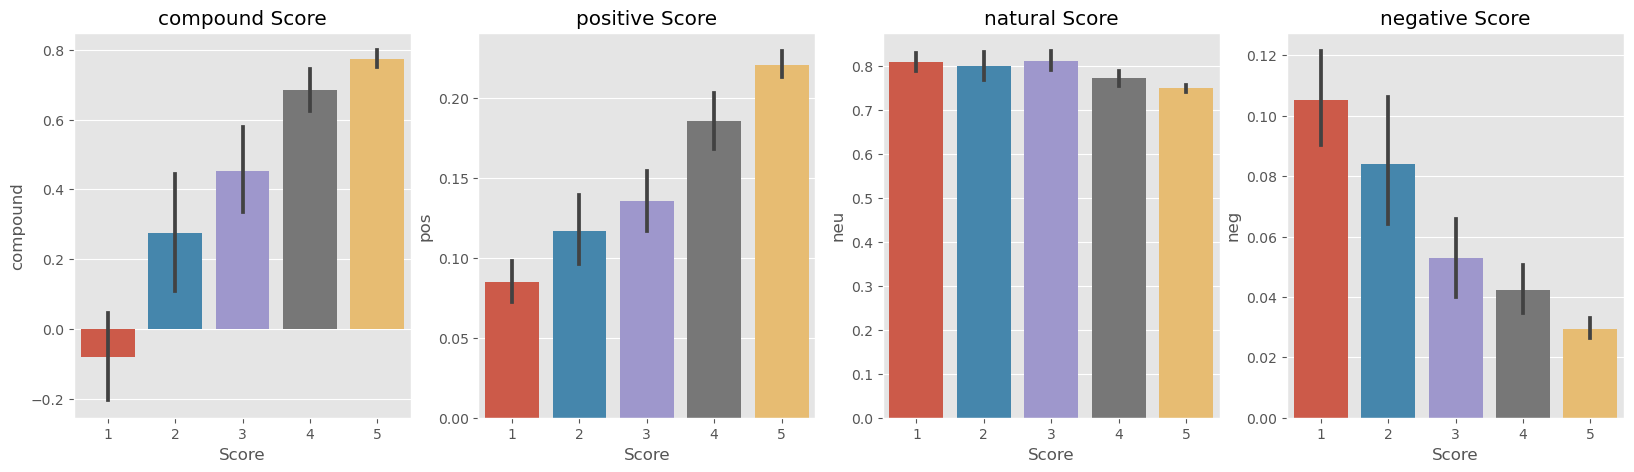

In [72]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
sns.barplot(data=vaders , x='Score',y='compound',ax=ax[0])
sns.barplot(data=vaders , x='Score',y='pos',ax=ax[1])
sns.barplot(data=vaders , x='Score',y='neu',ax=ax[2])
sns.barplot(data=vaders , x='Score',y='neg',ax=ax[3])
ax[0].set_title('compound Score')
ax[1].set_title('positive Score')
ax[2].set_title('natural Score')
ax[3].set_title('negative Score')
plt.show 

# step 3 Roberta pretrained Model:
- Use a model trained of large corpus of data (Deep learning).
- Transformer model accounts for the words but also the context related to other words. 

In [27]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification 
from scipy.special import softmax

In [31]:
model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model)
modele = AutoModelForSequenceClassification.from_pretrained(model)

C:\Users\DELL G3 15\anaconda3\lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\DELL G3 15\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [53]:
ndata 

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...,0.026,0.721,0.253,0.9788
996,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i...",0.000,0.786,0.214,0.9309
997,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...,0.000,0.673,0.327,0.9634
998,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...,0.063,0.874,0.062,-0.0129
